<a href="https://colab.research.google.com/github/ishahmshah1025/Mindspark-24/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Fetch historical stock data
def fetch_stock_data(ticker):
    stock_data = yf.download(ticker, period='1y', interval='1d')
    stock_data['Return'] = stock_data['Close'].pct_change()
    stock_data.dropna(inplace=True)
    return stock_data

# Step 2: Prepare the data for modeling
def prepare_data(stock_data):
    stock_data['Lagged Return'] = stock_data['Return'].shift(1)
    stock_data.dropna(inplace=True)
    X = stock_data[['Lagged Return']]
    y = stock_data['Return']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and train the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Step 4: Predict using real-time data
def predict_real_time(model, ticker):
    # Fetch the latest data
    latest_data = yf.download(ticker, period='1d', interval='1m')
    latest_return = latest_data['Close'].pct_change().iloc[-1]

    # Create a DataFrame for the prediction
    prediction_input = pd.DataFrame([[latest_return]], columns=['Lagged Return'])

    prediction = model.predict(prediction_input)
    return prediction

# Main function
def main():
    ticker = input("Enter the stock ticker (e.g., 'AAPL'): ").strip().upper()

    # Fetch historical data
    stock_data = fetch_stock_data(ticker)

    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(stock_data)

    # Train the model
    model = train_model(X_train, y_train)

    # Make a prediction based on the latest data
    prediction = predict_real_time(model, ticker)

    print(f"Predicted return for {ticker}: {prediction[0]:.4f}")

if __name__ == "__main__":
    main()


Enter the stock ticker (e.g., 'AAPL'): AAPL


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Predicted return for AAPL: 0.0012


Enter the stock ticker (e.g., 'AAPL'): AAPL


[*********************100%***********************]  1 of 1 completed


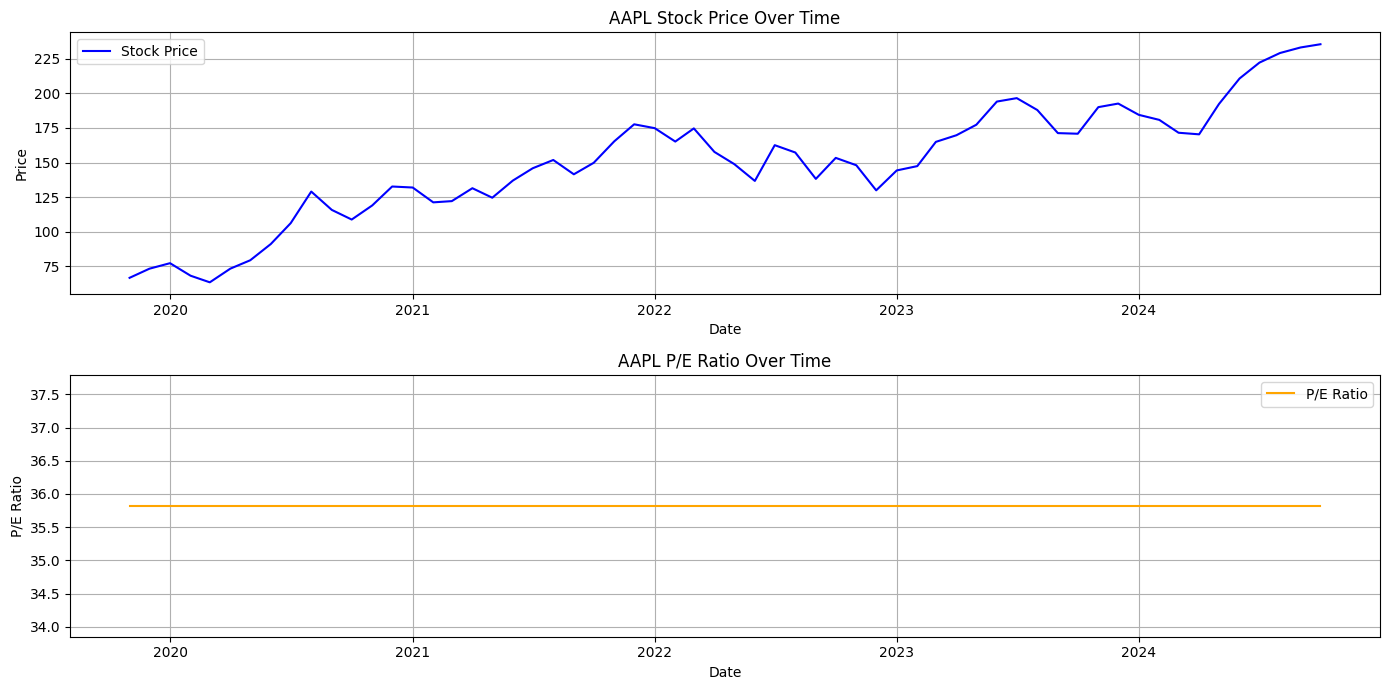

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch stock data and P/E ratio
def fetch_stock_data(ticker):
    # Fetch historical stock price data
    stock_data = yf.download(ticker, period='5y', interval='1mo')
    stock_data['Year'] = stock_data.index.year

    # Calculate P/E ratio
    pe_ratios = []
    for date in stock_data.index:
        stock_info = yf.Ticker(ticker).info
        pe_ratio = stock_info.get('trailingPE', None)  # Fetch P/E ratio
        pe_ratios.append(pe_ratio)

    stock_data['P/E Ratio'] = pe_ratios
    return stock_data

# Function to plot stock price and P/E ratio
def plot_stock_pe_ratio(stock_data, ticker):
    plt.figure(figsize=(14, 7))

    # Plot stock price
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Close'], label='Stock Price', color='blue')
    plt.title(f'{ticker} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

    # Plot P/E ratio
    plt.subplot(2, 1, 2)
    plt.plot(stock_data['P/E Ratio'], label='P/E Ratio', color='orange')
    plt.title(f'{ticker} P/E Ratio Over Time')
    plt.xlabel('Date')
    plt.ylabel('P/E Ratio')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Main function
def main():
    ticker = input("Enter the stock ticker (e.g., 'AAPL'): ").strip().upper()

    # Fetch stock data
    stock_data = fetch_stock_data(ticker)

    # Plot stock price and P/E ratio
    plot_stock_pe_ratio(stock_data, ticker)

if __name__ == "__main__":
    main()


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch stock data and P/E ratio
def fetch_stock_data(ticker):
    # Fetch historical stock price data
    stock_data = yf.download(ticker, period='5y', interval='1mo')
    stock_data['Year'] = stock_data.index.year

    # Calculate P/E ratio
    pe_ratios = []
    for date in stock_data.index:
        stock_info = yf.Ticker(ticker).info
        pe_ratio = stock_info.get('trailingPE', None)  # Fetch P/E ratio
        pe_ratios.append(pe_ratio)

    stock_data['P/E Ratio'] = pe_ratios
    return stock_data

# Function to plot stock price and P/E ratio
def plot_stock_pe_ratio(stock_data, ticker):
    plt.figure(figsize=(14, 7))

    # Plot stock price
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Close'], label='Stock Price', color='blue')
    plt.title(f'{ticker} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

    # Plot P/E ratio
    plt.subplot(2, 1, 2)
    plt.plot(stock_data['P/E Ratio'], label='P/E Ratio', color='orange')
    plt.title(f'{ticker} P/E Ratio Over Time')
    plt.xlabel('Date')
    plt.ylabel('P/E Ratio')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Take user input for stock ticker
    ticker = input("Enter the stock ticker (e.g., 'AAPL'): ").strip().upper()

    # Fetch stock data
    stock_data = fetch_stock_data(ticker)

    # Plot stock price and P/E ratio
    plot_stock_pe_ratio(stock_data, ticker)

if __name__ == "__main__":
    main()


KeyboardInterrupt: Interrupted by user